In [3]:
import tweepy

In [2]:
import pandas as pd


def scrape(words, date_since, numtweet):

    db = pd.DataFrame(columns=['Id','username','totaltweets','retweetcount','created_at','likes','text', 'hashtags'])
    tweets = tweepy.Cursor(api.search, q=words, lang="en",since=date_since, tweet_mode='extended').items(numtweet)

    list_tweets = [tweet for tweet in tweets]
    for tweet in list_tweets:
        username = tweet.user.screen_name
        totaltweets = tweet.user.statuses_count
        retweetcount = tweet.retweet_count
        creation = tweet.created_at
        ids = tweet.id
        likes = tweet.favorite_count
        hashtags = tweet.entities['hashtags']
        text = tweet.full_text
        
        hashtext = list()
        for j in range(0, len(hashtags)):
            hashtext.append(hashtags[j]['text'])

        ith_tweet = [ids,username,totaltweets,retweetcount,creation,likes,text, hashtext]
        db.loc[len(db)] = ith_tweet
    filename = words + '_final_scraped_tweets.csv'
    db.to_csv(filename)
    return db


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
scrape('#CoronaSecondWave', '2021-04-15', 3000)


In [51]:
df = pd.read_csv('#CoronaSecondWave_final_scraped_tweets.csv')

indexToDrop = []
for index, row in df.iterrows():
    if (row["text"][0:2] == "RT"):
        indexToDrop.append(index)
new_df = df.drop(df.index[indexToDrop])
new_df

,Unnamed: 0,Id,username,totaltweets,retweetcount,created_at,likes,text,hashtags
7,7,1384859492282687490,MeBhavya,18102,0,2021-04-21 13:20:07,1,System not COLLAPSED. \n\nIt’s just EXPOSED. T...,"['CoronavirusPandemic', 'CoronaSecondWave']"
15,15,1384859020335349762,IshitaThapliya4,45,2,2021-04-21 13:18:14,0,DEHRADUN UTTARAKHAND\n\nALL OF MY RESOURCES AR...,"['Dehradun', 'COVID19', 'Uttarakhand', 'Corona..."
16,16,1384859012450197504,HeenaJo51384576,13,0,2021-04-21 13:18:12,0,Interpretations doing the rounds about yesterd...,"['CoronaPandemic', 'CoronaSecondWave', 'IndiaF..."
25,25,1384858352665124871,saumyprateek,695,0,2021-04-21 13:15:35,1,Does anybody else feel the same way... I say 2...,['CoronaSecondWave']
28,28,1384858198587420673,Khaitan21,4377,0,2021-04-21 13:14:58,0,Dr. Ganesh K Mani Reacts To ICMR Report On COV...,"['VaccineForAll', 'CoronaVaccine', 'Coronaviru..."
...,...,...,...,...,...,...,...,...,...
2988,2988,1384739009549672449,kv_saraswat,116,0,2021-04-21 05:21:21,0,Need 4 Vials of #Remdisivir in #jaipur urgentl...,"['Remdisivir', 'jaipur', 'Help', 'CoronaSecond..."
2990,2990,1384738994278211586,buopso,12,0,2021-04-21 05:21:18,1,#India now added to the #UK 's 'red list' pro...,"['India', 'UK', 'Covid_19', 'CoronavirusPandem..."
2993,2993,1384738950896513027,sukritdhingra,5073,0,2021-04-21 05:21:07,1,It's getting serious day by day. We have almos...,['CoronaSecondWave']
2996,2996,1384738859540389894,abuzargaffarisr,2545,0,2021-04-21 05:20:45,0,who have been home quarantined post testing po...,"['Coronavirus', 'COVID19India', 'COVIDSecondWa..."


In [52]:
import preprocessor as pp
from collections import Counter
import re
import operator
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
import json
import nltk
import string



def removeother(words):
    removing_ele = "!\"$%&'()*+,-./:;<=>?@[\]^_`{|}~"
    words = words.replace('\\n',' ')
    words = words.translate(str.maketrans('', '', removing_ele))
    words = words.split()
    l = []
    for word in words:
        if(word[0] == '#'):
            l.append(word.lower())
    return l;


def top10(dataframe):
    hashtag_list = []
    content = dataframe['text'].fillna('').apply(str)
    for x in content:
        total = removeother(x)
        for y in total:
            hashtag_list.append(y)

    topHashtags = dict(Counter(hashtag_list).most_common(11))
    return topHashtags



In [53]:
i = 1
top_tw = []
for key in top10(new_df):
    if(i == 1):
        i += 1
        continue
    top_tw.append(key)
top_tw

['#covid19india',
 '#covid19',
 '#covidemergency',
 '#coronavirus',
 '#coronavirusindia',
 '#covidemergency2021',
 '#covidsecondwaveinindia',
 '#coronaviruspandemic',
 '#india',
 '#bjpfailsindia']

In [55]:
for x in top_tw:
    scrape(x, '2021-04-15', 2000)
    print(x + "_final_scraped_tweets.csv" + " ==> File saved")

#covid19india_final_scraped_tweets.csv ==> File saved
#covid19_final_scraped_tweets.csv ==> File saved
#covidemergency_final_scraped_tweets.csv ==> File saved
#coronavirus_final_scraped_tweets.csv ==> File saved
#coronavirusindia_final_scraped_tweets.csv ==> File saved
#covidemergency2021_final_scraped_tweets.csv ==> File saved
#covidsecondwaveinindia_final_scraped_tweets.csv ==> File saved
#coronaviruspandemic_final_scraped_tweets.csv ==> File saved
#india_final_scraped_tweets.csv ==> File saved
#bjpfailsindia_final_scraped_tweets.csv ==> File saved


In [56]:
dataframe_list = []
df1 = pd.read_csv('#covid19india_final_scraped_tweets.csv')
df2 = pd.read_csv('#covid19_final_scraped_tweets.csv')
df3 = pd.read_csv('#covidemergency_final_scraped_tweets.csv')
df4 = pd.read_csv('#coronavirus_final_scraped_tweets.csv')
df5 = pd.read_csv('#coronavirusindia_final_scraped_tweets.csv')
df6 = pd.read_csv('#covidemergency2021_final_scraped_tweets.csv')
df7 = pd.read_csv('#covidsecondwaveinindia_final_scraped_tweets.csv')
df8 = pd.read_csv('#coronaviruspandemic_final_scraped_tweets.csv')
df9 = pd.read_csv('#india_final_scraped_tweets.csv')
df10 = pd.read_csv('#bjpfailsindia_final_scraped_tweets.csv')

In [57]:
dataframe_list = []
dataframe_list.append(df)
dataframe_list.append(df1)
dataframe_list.append(df2)
dataframe_list.append(df3)
dataframe_list.append(df4)
dataframe_list.append(df5)
dataframe_list.append(df6)
dataframe_list.append(df7)
dataframe_list.append(df8)
dataframe_list.append(df9)
dataframe_list.append(df10)

In [58]:
main_df = pd.concat(dataframe_list) 
main_df

,Unnamed: 0,Id,username,totaltweets,retweetcount,created_at,likes,text,hashtags
0,0,1384859767286423554,DDC_Kulgam,6,6,2021-04-21 13:21:12,0,"RT @DcKulgam: Bogund, Laroo, and Khanpora Yari...",[]
1,1,1384859698600497153,RubinadilaikTe1,14113,25,2021-04-21 13:20:56,0,RT @Rahul_5767: After watching that our fanclu...,['CoronaSecondWave']
2,2,1384859643692863488,AnuliVyas,10619,2,2021-04-21 13:20:43,0,RT @IshitaThapliya4: DEHRADUN UTTARAKHAND\n\nA...,[]
3,3,1384859616023040002,02_naina,34103,1,2021-04-21 13:20:36,0,RT @SekhonPuneet: @iamrealmohit434 @Kritika_Ka...,[]
4,4,1384859610369208323,HHighflier,4133,23,2021-04-21 13:20:35,0,RT @nups_lostsoul: All I can hear is Ambulance...,['COVID19']
...,...,...,...,...,...,...,...,...,...
1995,1995,1384499982628130817,Deboshmita19,2239,348,2021-04-20 13:31:33,0,RT @Aldo24657860: Know your Govt!!!\nKnow thei...,"['BJPFailsIndia', 'ModiMadeDisaster']"
1996,1996,1384499532046635008,prachi_shirur,33094,73,2021-04-20 13:29:45,0,RT @UWCforYouth: Einstein Goyal basically want...,"['TooMuchOxygen', 'BJPFailsIndia']"
1997,1997,1384499437339222019,SaashaSingh1,84095,18,2021-04-20 13:29:23,0,RT @VivekBansal72: No free vaccines for 18-45 ...,[]
1998,1998,1384499251720298500,VivekBansal72,4146,18,2021-04-20 13:28:39,41,No free vaccines for 18-45 years \nof age \n\...,"['BJPFailsIndia', 'BjpResponsibleForCoronaInIn..."


In [59]:
main_df.sort_values("Id", inplace = True)
main_df.drop_duplicates(subset ="Id", keep = False, inplace = True)
main_df.to_csv('final_main_data.csv')
main_df

,Unnamed: 0,Id,username,totaltweets,retweetcount,created_at,likes,text,hashtags
1999,1999,1384499227540082691,KaranSa74843465,450,3,2021-04-20 13:28:33,0,RT @kalaingarism: @KanganaTeam @stopbeingunfai...,[]
1998,1998,1384499251720298500,VivekBansal72,4146,18,2021-04-20 13:28:39,41,No free vaccines for 18-45 years \nof age \n\...,"['BJPFailsIndia', 'BjpResponsibleForCoronaInIn..."
1997,1997,1384499437339222019,SaashaSingh1,84095,18,2021-04-20 13:29:23,0,RT @VivekBansal72: No free vaccines for 18-45 ...,[]
1996,1996,1384499532046635008,prachi_shirur,33094,73,2021-04-20 13:29:45,0,RT @UWCforYouth: Einstein Goyal basically want...,"['TooMuchOxygen', 'BJPFailsIndia']"
1995,1995,1384499982628130817,Deboshmita19,2239,348,2021-04-20 13:31:33,0,RT @Aldo24657860: Know your Govt!!!\nKnow thei...,"['BJPFailsIndia', 'ModiMadeDisaster']"
...,...,...,...,...,...,...,...,...,...
0,0,1384886498529464327,Chandansahoo378,65500,0,2021-04-21 15:07:25,0,@fanfight_app 3 Hattricks Against\n1) Deccan C...,"['cricket', 'ipl', 'IPL2021', 'festival', 'con..."
3,3,1384886666272276484,RitamBa18328256,1846,3,2021-04-21 15:08:05,0,"RT @Dayasankar31: ""Double engine"" govt hidding...","['GujaratModel', 'BJPFailsIndia', 'ModiResign'..."
2,2,1384886677613645836,anmol2312,49,0,2021-04-21 15:08:08,0,"So many people dying, government is under repo...",['BJPFailsIndia']
1,1,1384887040475496453,Shoebakmal,784,0,2021-04-21 15:09:35,0,I am Still Afraid...\nNirmala Sitharaman May D...,"['BJPFailsIndia', 'ModiGovtSeNaHoPayega', 'Mod..."


In [60]:
inToDrop = []
for index, row in main_df.iterrows():
    if (row["text"][0:2] == "RT"):
        inToDrop.append(index)
lat_df = main_df.drop(main_df.index[inToDrop])
lat_df

,Unnamed: 0,Id,username,totaltweets,retweetcount,created_at,likes,text,hashtags
2778,2778,1384747583084515328,dopaminyoongi,219377,98,2021-04-21 05:55:25,0,RT @namgiskies: 5 ICU BEDS AVAILABLE IN SIR GA...,"['Delhi', 'CoronaSecondWave']"
2771,2771,1384747751666196482,IllIlIIllIlIl,31511,98,2021-04-21 05:56:06,0,RT @namgiskies: 5 ICU BEDS AVAILABLE IN SIR GA...,"['Delhi', 'CoronaSecondWave']"
1049,1049,1384747798889861121,IshikaKaplash,16,1,2021-04-21 05:56:17,0,Hi everyone Ishika this side . Guys please hel...,"['PlasmaDonor', 'palsma', 'COVID19India', 'COV..."
2768,2768,1384747949465509890,Daffodi07320953,31410,37,2021-04-21 05:56:53,0,RT @Lakshmimittal12: #Delhi Hospital Update - ...,['Delhi']
2766,2766,1384747973909704704,JhalakPortal,15136,0,2021-04-21 05:56:59,1,India sees the biggest spike of nearly 3L Covi...,"['CoronaSecondWave', 'COVID19', 'COVIDー19', 'e..."
...,...,...,...,...,...,...,...,...,...
0,0,1384886498529464327,Chandansahoo378,65500,0,2021-04-21 15:07:25,0,@fanfight_app 3 Hattricks Against\n1) Deccan C...,"['cricket', 'ipl', 'IPL2021', 'festival', 'con..."
3,3,1384886666272276484,RitamBa18328256,1846,3,2021-04-21 15:08:05,0,"RT @Dayasankar31: ""Double engine"" govt hidding...","['GujaratModel', 'BJPFailsIndia', 'ModiResign'..."
2,2,1384886677613645836,anmol2312,49,0,2021-04-21 15:08:08,0,"So many people dying, government is under repo...",['BJPFailsIndia']
1,1,1384887040475496453,Shoebakmal,784,0,2021-04-21 15:09:35,0,I am Still Afraid...\nNirmala Sitharaman May D...,"['BJPFailsIndia', 'ModiGovtSeNaHoPayega', 'Mod..."


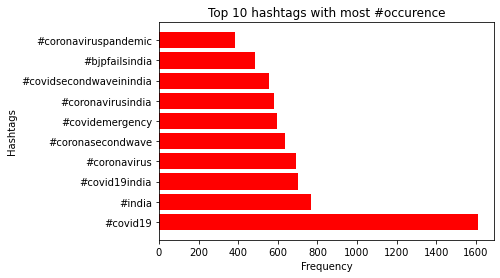

In [61]:
from matplotlib import pyplot as plt

def occurance(words):
    removing_ele = "!\"$%&'()*+,-./:;<=>?@[\]^_`{|}~"
    words = words.replace('\\n',' ')
    words = words.translate(str.maketrans('', '', removing_ele))
    words = words.split()
    l = []
    for word in words:
        if(word[0] == '#'):
            if word in l:
                continue
            l.append(word.lower())
    return l

def top(dataframe):
    hashtag_list = []
    content = dataframe['text'].fillna('').apply(str)
    for x in content:
        total = occurance(x)
        for y in total:
            hashtag_list.append(y)

    topHashtags = dict(Counter(hashtag_list).most_common(10))
    xaxis = []
    yaxis = []

    for x in topHashtags.keys():
        xaxis.append(x)
        yaxis.append(topHashtags[x])

    barplot = plt.barh(xaxis, yaxis, color ='r')
    plt.ylabel('Hashtags')
    plt.xlabel('Frequency')
    plt.title('Top 10 hashtags with most #occurence')
    return topHashtags

ocurr = top(lat_df)

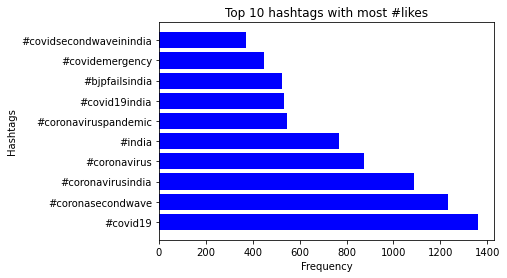

In [62]:
def top_likes(dataframe):
    hashtag_dic = {}
    count_zero = 0
    count = 0
    for index, rows in dataframe.iterrows():
        x = rows['text']
        total = occurance(x)
        like = rows['likes']
        if(like == 0):
            count_zero += 1
        else:
            count+= 1
        for y in total:
            if y in hashtag_dic.keys():
                hashtag_dic[y] += like
            else:
                hashtag_dic[y] = like

    #print(count_zero, count)
    topHashtags = dict(Counter(hashtag_dic).most_common(10))
    xaxis = []
    yaxis = []

    for x in topHashtags.keys():
        xaxis.append(x)
        yaxis.append(topHashtags[x])

    barplot = plt.barh(xaxis, yaxis, color ='b')
    plt.ylabel('Hashtags')
    plt.xlabel('Frequency')
    plt.title('Top 10 hashtags with most #likes')
    return topHashtags

likedic = top_likes(lat_df)

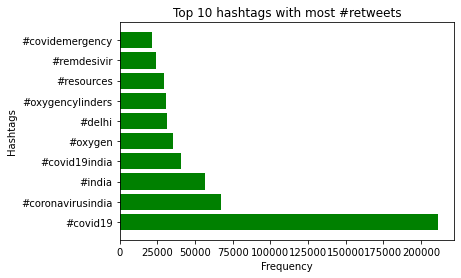

In [63]:
def top_retweets(dataframe):
    hashtag_dic = {}
    for index, rows in dataframe.iterrows():
        x = rows['text']
        total = occurance(x)
        rt = rows['retweetcount']
        for y in total:
            if y in hashtag_dic.keys():
                hashtag_dic[y] += rt
            else:
                hashtag_dic[y] = rt

    topHashtags = dict(Counter(hashtag_dic).most_common(10))
    xaxis = []
    yaxis = []

    for x in topHashtags.keys():
        xaxis.append(x)
        yaxis.append(topHashtags[x])

    barplot = plt.barh(xaxis, yaxis, color ='g')
    plt.ylabel('Hashtags')
    plt.xlabel('Frequency')
    plt.title('Top 10 hashtags with most #retweets')
    return topHashtags

retweet_dic = top_retweets(lat_df)

In [64]:
l = []
for index, rows in main_df.iterrows():
    x = rows['text']
    total = occurance(x)
    l.append(total)

main_df['all_hashtags'] = l
main_df

,Unnamed: 0,Id,username,totaltweets,retweetcount,created_at,likes,text,hashtags,all_hashtags
1999,1999,1384499227540082691,KaranSa74843465,450,3,2021-04-20 13:28:33,0,RT @kalaingarism: @KanganaTeam @stopbeingunfai...,[],[]
1998,1998,1384499251720298500,VivekBansal72,4146,18,2021-04-20 13:28:39,41,No free vaccines for 18-45 years \nof age \n\...,"['BJPFailsIndia', 'BjpResponsibleForCoronaInIn...","[#bjpfailsindia, #bjpresponsibleforcoronainindia]"
1997,1997,1384499437339222019,SaashaSingh1,84095,18,2021-04-20 13:29:23,0,RT @VivekBansal72: No free vaccines for 18-45 ...,[],[]
1996,1996,1384499532046635008,prachi_shirur,33094,73,2021-04-20 13:29:45,0,RT @UWCforYouth: Einstein Goyal basically want...,"['TooMuchOxygen', 'BJPFailsIndia']","[#toomuchoxygen, #bjpfailsindia]"
1995,1995,1384499982628130817,Deboshmita19,2239,348,2021-04-20 13:31:33,0,RT @Aldo24657860: Know your Govt!!!\nKnow thei...,"['BJPFailsIndia', 'ModiMadeDisaster']","[#bjpfailsindia, #modimadedisaster]"
...,...,...,...,...,...,...,...,...,...,...
0,0,1384886498529464327,Chandansahoo378,65500,0,2021-04-21 15:07:25,0,@fanfight_app 3 Hattricks Against\n1) Deccan C...,"['cricket', 'ipl', 'IPL2021', 'festival', 'con...","[#cricket, #ipl, #ipl2021, #festival, #contest..."
3,3,1384886666272276484,RitamBa18328256,1846,3,2021-04-21 15:08:05,0,"RT @Dayasankar31: ""Double engine"" govt hidding...","['GujaratModel', 'BJPFailsIndia', 'ModiResign'...","[#gujaratmodel, #bjpfailsindia, #modiresign, #..."
2,2,1384886677613645836,anmol2312,49,0,2021-04-21 15:08:08,0,"So many people dying, government is under repo...",['BJPFailsIndia'],[#bjpfailsindia]
1,1,1384887040475496453,Shoebakmal,784,0,2021-04-21 15:09:35,0,I am Still Afraid...\nNirmala Sitharaman May D...,"['BJPFailsIndia', 'ModiGovtSeNaHoPayega', 'Mod...","[#bjpfailsindia, #modigovtsenahopayega, #modim..."


In [65]:
nest_dic = {}


def create_nest(dic):
    
    for key in dic.keys():
        if key in nest_dic.keys():
            continue
        no_of_post = 1
        no_of_rt = 1
        
        user = {}
        nest_dic[key] = {}
        for index, rows in main_df.iterrows():
            
            if key in rows['all_hashtags']:
                no_of_post += 1
                
                if(rows["text"][0:2] == "RT"):
                    no_of_rt += 1

                username = rows['username']
                if username in user.keys():
                    user[username] +=1
                else:
                    user[username] = 1
        nest_dic[key]['no_of_post'] = no_of_post
        nest_dic[key]['no_of_rt'] = no_of_rt
        nest_dic[key]['user'] = user

create_nest(ocurr)

In [66]:
def CTM(dic):
    ctm_dic = {}

    for key in dic.keys():
        ctm_dic[key] = {}
        R = round(nest_dic[key]['no_of_post']/nest_dic[key]['no_of_rt'] , 2)
        Rx = round((100 - (R*10))/10,2)
        ctm_dic[key]['R/10'] = Rx
        
        if(len(nest_dic[key]['user']) >= 50):
            top_fifty = dict(Counter(nest_dic[key]['user']).most_common(50))
        else:
            top_fifty = dict(Counter(nest_dic[key]['user']).most_common(len(nest_dic[key]['user'])))

        total_tweets = 0
        for x in top_fifty.keys():
            total_tweets += top_fifty[x]

        F = round(nest_dic[key]['no_of_post']/total_tweets, 2)
        ctm_dic[key]['F'] = F

        U = round(nest_dic[key]['no_of_post']/len(nest_dic[key]['user']), 2)
        ctm_dic[key]['U'] = U

        ctm = Rx + F + U
        ctm_dic[key]['Coefficient'] = ctm
    return ctm_dic

ctm_dic = CTM(ocurr)

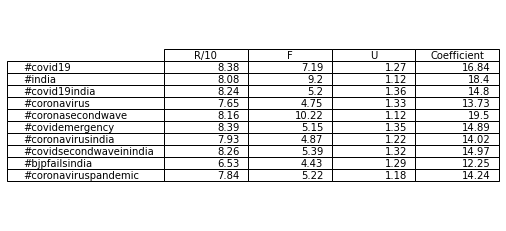

In [67]:
def create_table(ctm_dic):
    fig, ax =plt.subplots(1,1)

    labal = []
    data = []

    for key in ctm_dic.keys():
        labal.append(key)
        l = []
        l.append(ctm_dic[key]['R/10'])
        l.append(ctm_dic[key]['F'])
        l.append(ctm_dic[key]['U'])
        l.append(round(ctm_dic[key]['Coefficient'],2))
        data.append(l)

    column_labels=["R/10", "F", "U","Coefficient"]
    dxf=pd.DataFrame(data,columns=column_labels)
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=dxf.values,colLabels=dxf.columns,rowLabels= labal,loc="center")

    plt.show()

create_table(ctm_dic)

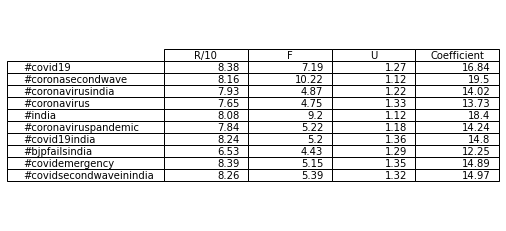

In [68]:
create_nest(likedic)
ctm_like_dic = CTM(likedic)
create_table(ctm_like_dic)

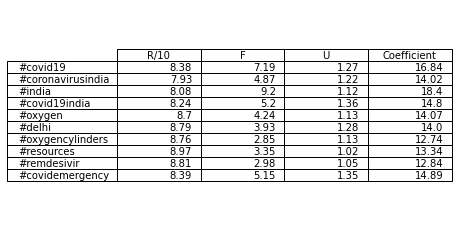

In [69]:
create_nest(retweet_dic)
ctm_rt_dic = CTM(retweet_dic)
create_table(ctm_rt_dic)